# Gun Violence 2013 thru March 2018
Gun violence seems to be on the rise.  It is a rare month that goes buy that you do not hear about some form of gun violence.  There is surprisingly not a central location of this data that has such an effect on communities across the United States.

This notebook will chronicle exploring one of the datasets that is publicly available.  It will look at how many deaths are in the United States of America and if there are any areas that demonstrate higher probablity of gun violence taking place.  Looking at the date the occurrences happen we will also evaluate if there is a season or day of the week for gun violence to happen.

The data we are looking at is from kaggle at https://www.kaggle.com/jameslko/gun-violence-data.  It is pulled from http://gunviolencearchive.org, a group that pulls this data from about 7500 sources.  It is just one of several organizations that is looking to have a centeralized location for near real time data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import neighbors, svm
from sklearn.model_selection import cross_val_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
# Importing data and parsing date from the date column.
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv', parse_dates = ['date'])

## Exploratory Data Analysis

In [3]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null datetime64[ns]
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude            

In [6]:
df[['n_killed', 'n_injured', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_name', 'participant_relationship', 'participant_status', 'participant_type', 'n_guns_involved']]

,n_killed,n_injured,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,n_guns_involved
0,0,4,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN
1,1,3,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN
2,1,3,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2.0
3,4,0,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,NaN
4,2,2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2.0
...,...,...,...,...,...,...,...,...,...,...
239672,0,0,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,1.0
239673,1,0,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1.0
239674,0,1,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,1.0
239675,1,0,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,1.0


In [7]:
null = df.isnull().sum().sort_values(ascending = False)
null_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
null_total  = pd.concat([null, null_percent], axis=1, keys=['Total', 'Percent'])
null_total.head(20)

,Total,Percent
participant_relationship,223903,93.418643
location_description,197588,82.439283
participant_name,122253,51.007397
gun_stolen,99498,41.513370
gun_type,99451,41.493760
n_guns_involved,99451,41.493760
participant_age,92298,38.509327
notes,81017,33.802576
participant_age_group,42119,17.573234
state_house_district,38772,16.176771


The data has features for the participants age and it stores all parties involved within each row.  The main feature that I am interested in if n_killed.  Going to see if there is a correlation to deaths from gun violence and location.  There are also features that indicate the state House and Senate districts.

There are a few of the features that are not going to be useful.  While these are usefull for analyzing and viewing each incident individually, I am going to drop these out of the dataframe.

In [8]:
drop = ['incident_url', 'source_url', 'incident_url_fields_missing', 'notes', 'sources']
df = df.drop(columns=drop)

Setting the n_guns_involved N/A to 0

There is still a lot of missing data.  Most of it is just unknown or not applicable.  Setting missing data to unknown.

In [9]:
df['n_guns_involved'] = df['n_guns_involved'].fillna(0)

In [10]:
unknown = ['address', 'gun_stolen', 'gun_type', 'participant_age', 'participant_age_group',
          'participant_name', 'participant_status', 'participant_type']
df[unknown] = df[unknown].fillna('unknown')

Keeping the format of the participant_gender, setting it to represent Unknown if null.

In [11]:
df['participant_gender'] = df['participant_gender'].fillna("0::Unknown")

A few of the features that have null I am going to set to N/A.

In [12]:
na = ['incident_characteristics', 'location_description']
df[na] = df[na].fillna('N/A')

And filling in the na for participant relationship to reflect no relationship.

In [13]:
df['participant_relationship'] = df['participant_relationship'].fillna('No Relationship')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 24 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      227733 non-null float64
gun_stolen                  239677 non-null object
gun_type                    239677 non-null object
incident_characteristics    239677 non-null object
latitude                    231754 non-null float64
location_description        239677 non-null object
longitude                   231754 non-null float64
n_guns_involved             239677 non-null float64
participant_age             239677 non-null object
participant_age_group       239677 non-null object
participant_g

Filling the nulls of the congressional, house, and senate districts with the mode of the city or county that it is in.

In [15]:
missing_cong_dist = df['city_or_county'][df['congressional_district'].isna()].unique()

def missing_mode(what, where):
    missing = df[where][df[what].isna()].unique()
    for miss in missing:
        df[what].fillna(df.loc[df[where] == miss].mode()[what][0], inplace=True)

missing_mode('congressional_district', 'city_or_county')

In [16]:
missing_mode('state_house_district', 'city_or_county')

In [17]:
missing_mode('state_senate_district', 'city_or_county')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 24 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      239677 non-null float64
gun_stolen                  239677 non-null object
gun_type                    239677 non-null object
incident_characteristics    239677 non-null object
latitude                    231754 non-null float64
location_description        239677 non-null object
longitude                   231754 non-null float64
n_guns_involved             239677 non-null float64
participant_age             239677 non-null object
participant_age_group       239677 non-null object
participant_g

Getting the missing latitude and longitude.

In [19]:
df['address_full'] = df['latitude'].where(~df['latitude'].isna(), other=(df['address'].map(str) + ', ' + df['city_or_county'].map(str) + ', ' + df['state']), axis=0)

In [20]:
add_nan = df['address_full'][df['latitude'].isna()]
add_nan = add_nan.to_frame('address')

In [21]:
add_nan

,address
257,"unknown, Derry, Pennsylvania"
277,"104th Ave and Walnut St, Oakland, California"
1926,"3700 block of Coconino Dr., San Antonio, Texas"
1933,"2100 block of London Court, Henrico County, Vi..."
2184,"Harmons Hill Rd, Millsboro, Delaware"
...,...
239666,"3100 block of California St, Saint Louis, Miss..."
239668,"I-96, Detroit, Michigan"
239669,"Hayes Rd, Madison, Wisconsin"
239670,"1 block of N Paulina St, Chicago, Illinois"


Building a cache so that locations are only queried once.  Using pickle to store and load the saved cache.

In [22]:
cache = {}

In [23]:
import pickle
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from opencage.geocoder import OpenCageGeocode
import requests
import re


try:
    cache = pickle.load(open('cache.p', 'rb'))
except (OSError, IOError) as e:
    cache ={}

In [24]:
def geocode(add):
    cache = addCached(add)

    if (cache != False): 
        # Returns the values already in cache
        return cache
    if (cache == False):
        print('Querying for address: {}'.format(add))
        location = loc_nominatim(add)
        if (location == None):
            location = loc_openCage(add)
            if (location == None):
                print('Next up locationIQ')
                location = loc_locationIq(add)
                if (location == None):
                    location = loc_google(add)
                    if (location == None):
                        return

        if (location != None):
            saveToCache(add, location)
            return location

def addCached(add):
    global cache
    if (add in cache):
        if (cache[add] != None):
            #print('Got from Cache')
            return cache[add]
        if (cache[add] == None):
            print('Cache was none.')
            return False
    return False

def saveToCache(add, location):
    global cache
    if (location != None):
        cache[add] = location
        pickle.dump(cache, open('cache.p', 'wb'))
        print('Added to cache.')
    else:
        print('Location is None')

def loc_nominatim(add):
    lat_lon = {}
    # Setup geopy for Nominatim and set rate limits
    geolocator = Nominatim(user_agent='Student testing')
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    try:
        lat_lon = geolocator.geocode(add)
        if (lat_lon != None):
            print('Got from Nominatim')
            return lat_lon.raw
        else:
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('Nominatim failed with exception.')
        lat_lon = None
        return lat_lon
    
def loc_google(add):
    lat_lon = {}
    try:
        res = requests.get('https://www.google.com/maps/place/'+add)
        #print(res.text)
        #print(re.findall(r'(?:\/@)(-?\d+(\.\d+)),(-?\d+(\.\d+))', res.text))
        raw = re.findall(r'(?:\/@)(-?\d+(\.\d+)),(-?\d+(\.\d+))', res.text)[0]
        #print(raw)
        lat_lon['lat'], lat_lon['lon'] = raw[0], raw[2]
        if (lat_lon != None):
            print('Got from Google')
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('Google failed with exception.')
        lat_lon = None
        return lat_lon
        
def loc_openCage(add):
    lat_lon = {}
    # API key
    key = 'a1479ac1a65747dfa4b49a32d697861c'
    geocoder = OpenCageGeocode(key)
    try:
        location = geocoder.geocode(add)
        #print (location[0]['geometry']['lat'])
        lat_lon['lat'], lat_lon['lon'], lat_lon['extra'] = location[0]['geometry']['lat'], location[0]['geometry']['lng'], location
        if (lat_lon != None):
            print('Got from OpenCage')
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('OpenCage failed with exception.')
        lat_lon = None
        return lat_lon
    
def loc_locationIq(add):
    lat_lon = {}
    url = "https://us1.locationiq.com/v1/search.php"
    data = {
        'key': 'pk.92e024776968fa545bedc8929ae3f5d8',
        'q': add,
        'format': 'json'
    }
    try:
        response = requests.get(url, params=data)
        lat_lon = response.json()[0]
        if (lat_lon != None):
            print('Got from LocationIQ')
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('LocationIq failed with exception.')
        lat_lon = None
        return lat_lon

In [25]:
def get_loc(add):
    loc = geocode(add)
    if loc is None:
        return np.nan
    lat = loc['lat']
    lon = loc['lon']
    return pd.Series([lat, lon])

In [26]:
add_nan[['latitude', 'longitude']] = add_nan['address'].apply(get_loc)

Adding missing latitiude and longitude values into dataframe.

In [27]:
df.update(add_nan)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      239677 non-null float64
gun_stolen                  239677 non-null object
gun_type                    239677 non-null object
incident_characteristics    239677 non-null object
latitude                    239677 non-null object
location_description        239677 non-null object
longitude                   239677 non-null object
n_guns_involved             239677 non-null float64
participant_age             239677 non-null object
participant_age_group       239677 non-null object
participant_gen

In [29]:
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype('float64')

In [30]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,5.593343e+05,0.252290,0.494007,8.200537,37.556168,-89.326884,0.802964,52.139446,23.785511
std,2.931287e+05,0.521779,0.729952,8.312485,5.137083,14.354044,3.641656,39.226555,15.644004
min,9.211400e+04,0.000000,0.000000,0.000000,-16.420311,-171.429000,0.000000,1.000000,1.000000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.909000,-94.142400,0.000000,27.000000,10.000000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.585200,-86.251300,1.000000,35.000000,22.000000
75%,8.172280e+05,0.000000,1.000000,12.000000,41.447200,-80.054300,1.000000,77.000000,37.000000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,121.117222,400.000000,901.000000,94.000000


In [31]:
null = df.isnull().sum().sort_values(ascending = False)
null_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
null_total  = pd.concat([null, null_percent], axis=1, keys=['Total', 'Percent'])
null_total.head(20)

,Total,Percent
address_full,0,0.0
latitude,0,0.0
date,0,0.0
state,0,0.0
city_or_county,0,0.0
address,0,0.0
n_killed,0,0.0
n_injured,0,0.0
congressional_district,0,0.0
gun_stolen,0,0.0


## Feature Engineering

Lets extra a few extra date features and combine the total victims of each incident.

In [32]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekdayname'] = df['date'].dt.weekday_name
df['total'] = df['n_killed'] + df['n_injured']

Lets break down the information contained in the gender column.

In [33]:
def detail_extract(detail):
    detail = detail.split('||')
    detail =  [(x.split('::')) for x in detail]
    temp = []
    for  i in range (0, len(detail)):
        temp.append(detail[i][-1])
    return(temp)

Breakdown by gender.

In [34]:
df['gender'] = df['participant_gender'].apply(lambda x: detail_extract(x))
df['Males'] = df['gender'].apply(lambda x: x.count('Male'))
df['Females'] = df['gender'].apply(lambda x: x.count('Female'))
df['Gender_Unknown'] = df['gender'].apply(lambda x: x.count('Unknown'))
df['people count'] = df['Males'] + df['Females'] + df['Gender_Unknown']

## Data Visualization

Number of incidents by year.

Text(0, 0.5, 'Number of Cases')

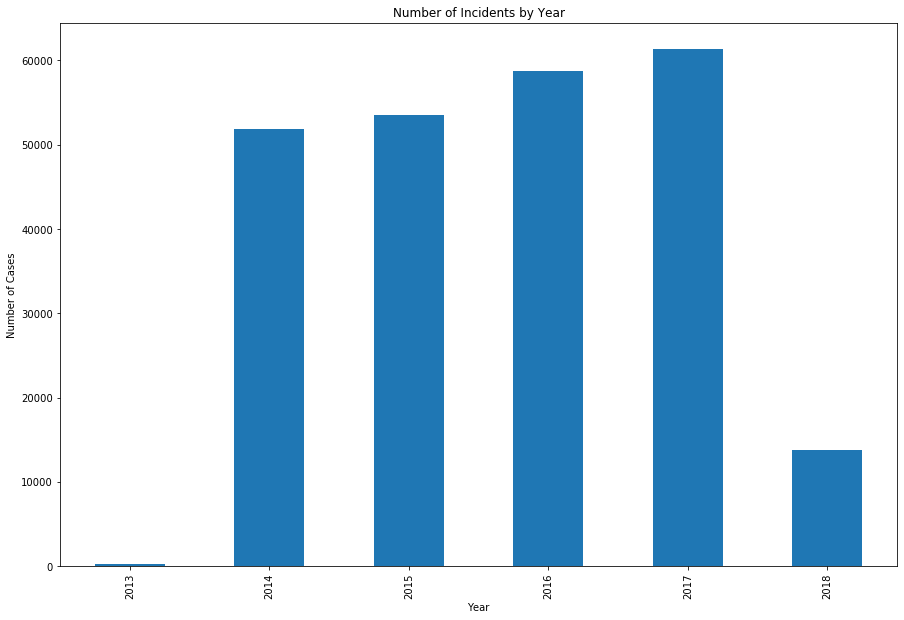

In [35]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize = (15,10))
plt.title('Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

Looks like years of 2013 and 2018 have a lot less then the rest of the years.  It is probably because there is just not as much data recorded during those years.

In [36]:
df.year.value_counts()

2017    61401
2016    58763
2015    53579
2014    51854
2018    13802
2013      278
Name: year, dtype: int64

In [37]:
#df['date'].where(df['year'] == 2013)
mask = (df['date'] > '2013-1-1') & (df['date'] <= '2013-12-31')
print(df['date'].loc[mask])

3     2013-01-05
4     2013-01-07
5     2013-01-07
6     2013-01-19
7     2013-01-21
         ...    
273   2013-12-29
274   2013-12-29
275   2013-12-31
276   2013-12-31
277   2013-12-31
Name: date, Length: 275, dtype: datetime64[ns]


In [38]:
# df['date'].where(df['year'] == 2018)
mask = (df['date'] > '2018-1-1') & (df['date'] <= '2018-12-31')
print(df['date'].loc[mask])

226117   2018-01-02
226118   2018-01-02
226119   2018-01-02
226120   2018-01-02
226121   2018-01-02
            ...    
239672   2018-03-31
239673   2018-03-31
239674   2018-03-31
239675   2018-03-31
239676   2018-03-31
Name: date, Length: 13560, dtype: datetime64[ns]


Here we can see that 2013 data spans the whole year, but there is much less incidents.  A quick search turns up an FBI quick look at shooting incidents in the United States.  Their analysis has it at 86 in 2013.  Where our data has inputed 278 incidents.

https://www.fbi.gov/about/partnerships/office-of-partner-engagement/active-shooter-incidents-graphics

2018 there we can see that the data only contains incidents up to March.

Total incidents by month.

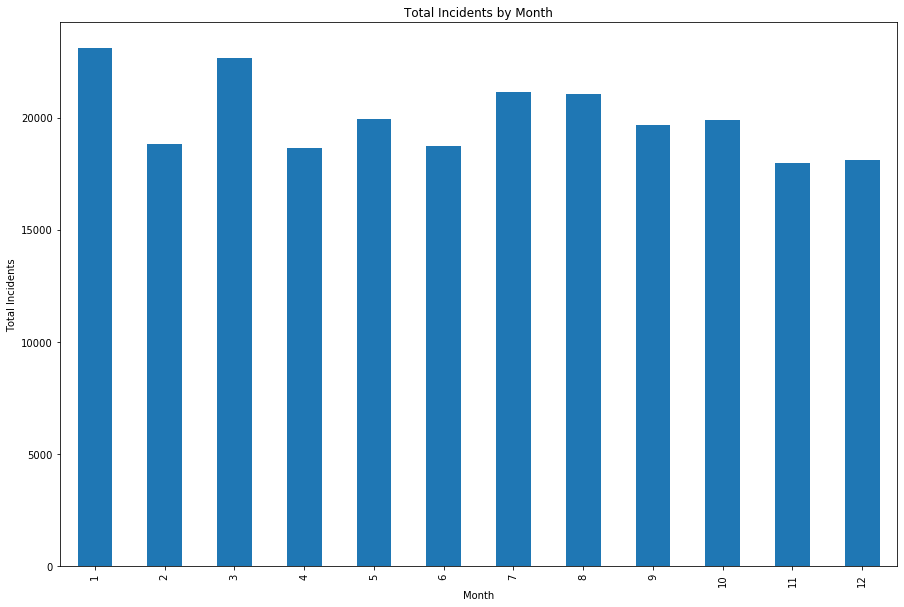

In [39]:
df.month.value_counts().sort_index().plot(kind='bar', figsize=(15,10))
plt.title('Total Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Total Incidents')
plt.show()

Nothing visually to indicate that the month has an effect on incidents.

Incidents broken down by state.

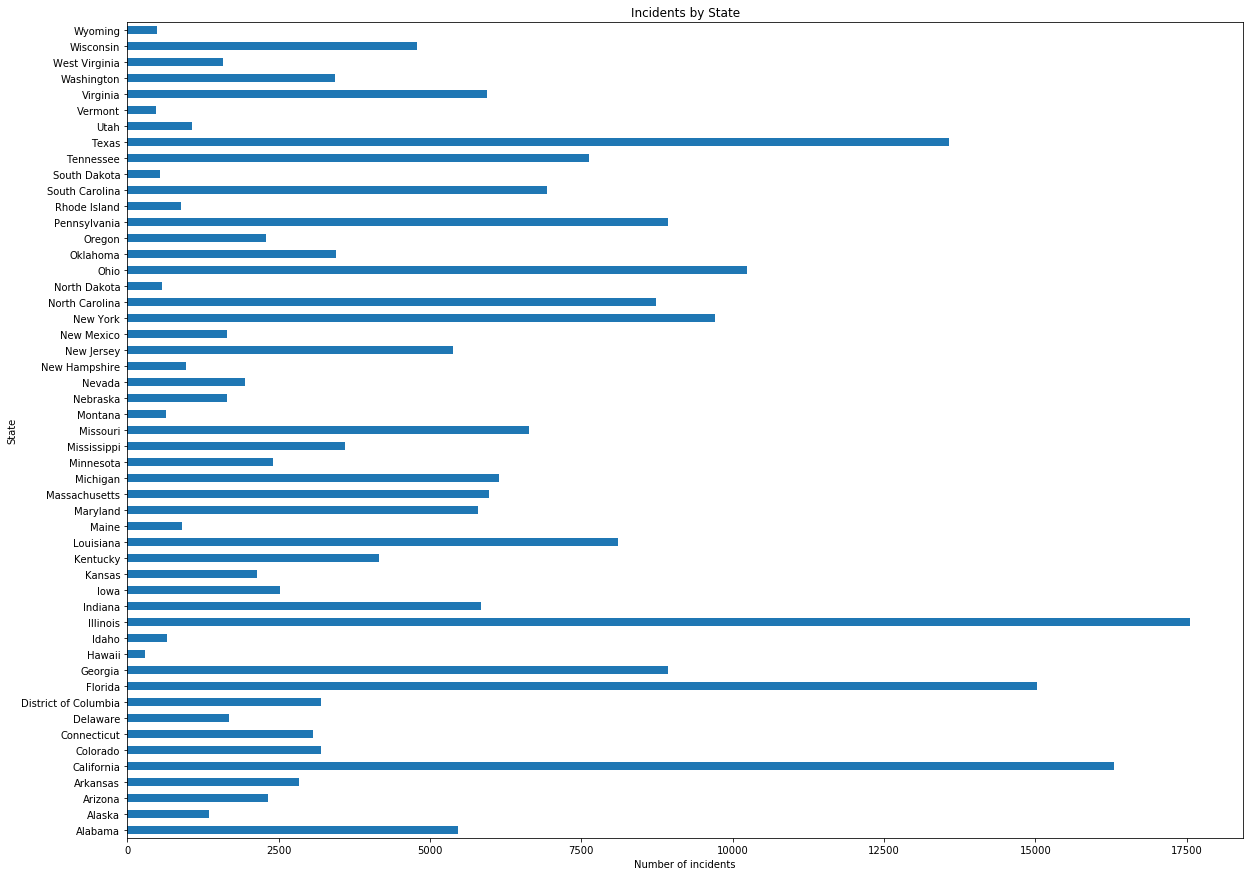

In [40]:
df.state.value_counts().sort_index().plot(kind='barh', figsize=(20,15))
plt.title('Incidents by State')
plt.xlabel('Number of incidents')
plt.ylabel('State')
plt.show()

There are a few states that have a lot more incidents then others.

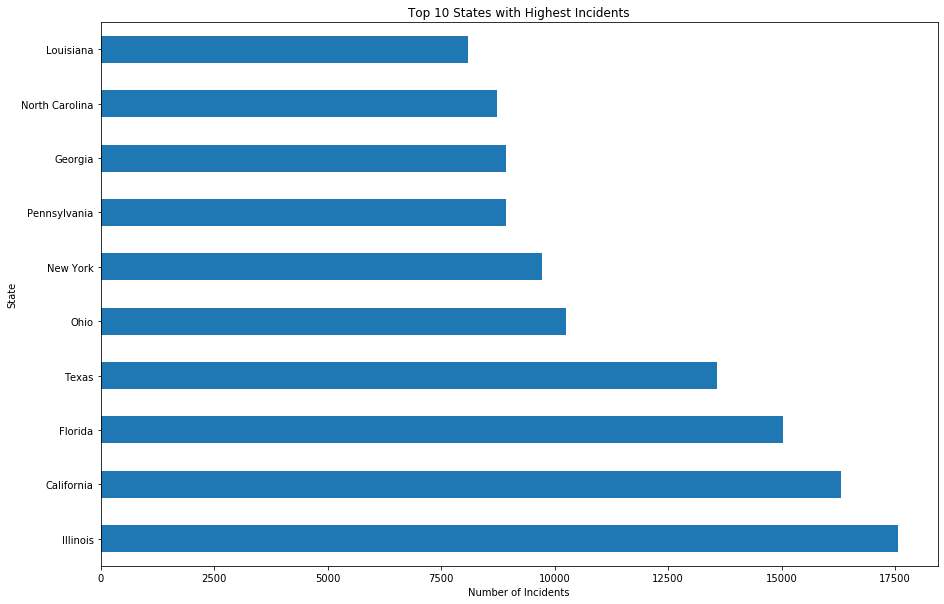

In [41]:
df.state.value_counts().head(10).plot(kind='barh', figsize=(15,10))
plt.title('Top 10 States with Highest Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.show()

There is a drop after the 4th top 10 states.  There is good indication that there is something going on the in the top 4 states that cause them to have a higher total incidents.

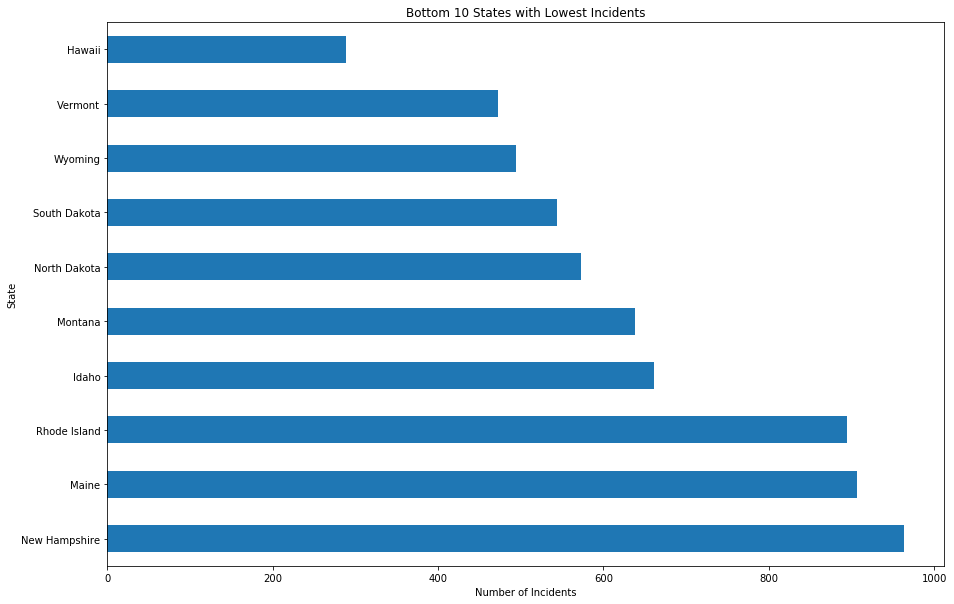

In [42]:
df.state.value_counts().tail(10).plot(kind='barh', figsize=(15,10))
plt.title('Bottom 10 States with Lowest Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.show()

There are some suprising states listed in the bottom 10 that you would not think to see here.  The increase in incidents as you move down the list is gradual but noticable after the 7th state from the bottom.

Here are the top 10 cities or counties with the most incidents.

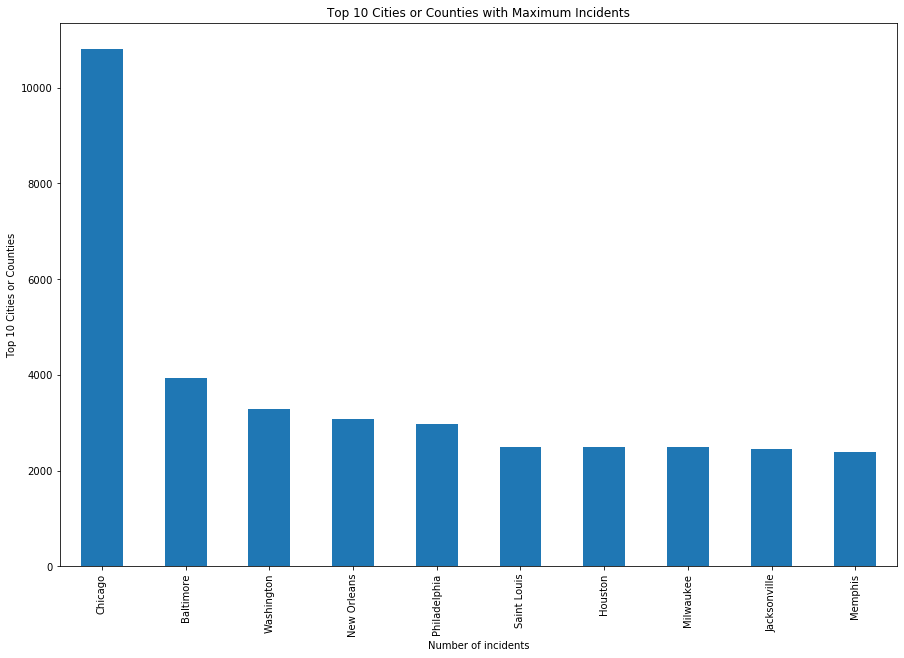

In [43]:
df.city_or_county.value_counts().head(10).plot(kind='bar', figsize=(15, 10))
plt.title('Top 10 Cities or Counties with Maximum Incidents')
plt.xlabel('Number of incidents')
plt.ylabel('Top 10 Cities or Counties')
plt.show()

We can see why Illinois is top of the list for incidents, the city of Chicago dominates the amount of incidents even in the top 10 highest.

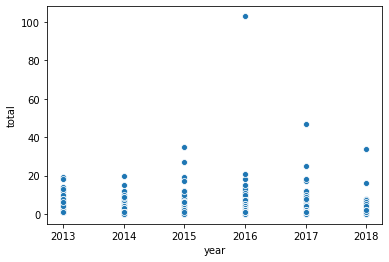

In [44]:
sns.scatterplot('year', 'total', data=df)

Looking at total victims by year you can see that some incidents have a high number of victims.  Since there is a year to year increase in the ammount of incidents we should expect to see the total amount of victims increase from year to year as well.

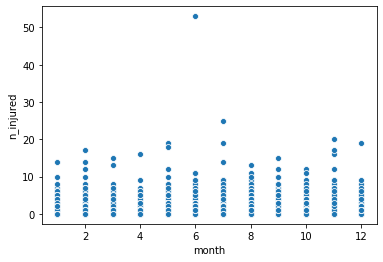

In [45]:
sns.scatterplot('month','n_injured', data=df)

This is also apparent in when breaking it down by months as well.  

In [46]:
df[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'total']].sort_values(['total'], ascending=[False]).head(15)

,date,state,city_or_county,address,n_killed,n_injured,total
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,103
217151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20,47
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19,35
232745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17,34
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18,27
195845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19,21
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16,20
73,2013-05-12,Louisiana,New Orleans,Frenchmen Street,0,19,19
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9,19


Sorting out the worst incidents, you can see these directly reflected in the scatterplots above.

In [47]:
df.drop(df.sort_values(['total'], ascending=[False]).head(8).index, inplace=True)

Dropping the top 8 incidents as they involve 20 people and more, to decrease the amount of outliers.

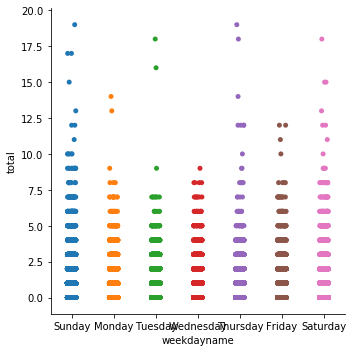

In [48]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.catplot('weekdayname','total', data=df, order=order)

In [49]:
df['total'].groupby(df['weekdayname']).sum().sort_values()

weekdayname
Thursday     22213
Tuesday      23085
Wednesday    23187
Friday       23628
Monday       24526
Saturday     30347
Sunday       31572
Name: total, dtype: int64

Looks like the amount of incidents do go up during the weekend.  Sunday being the day of the week that contains the highest amount of incidents.

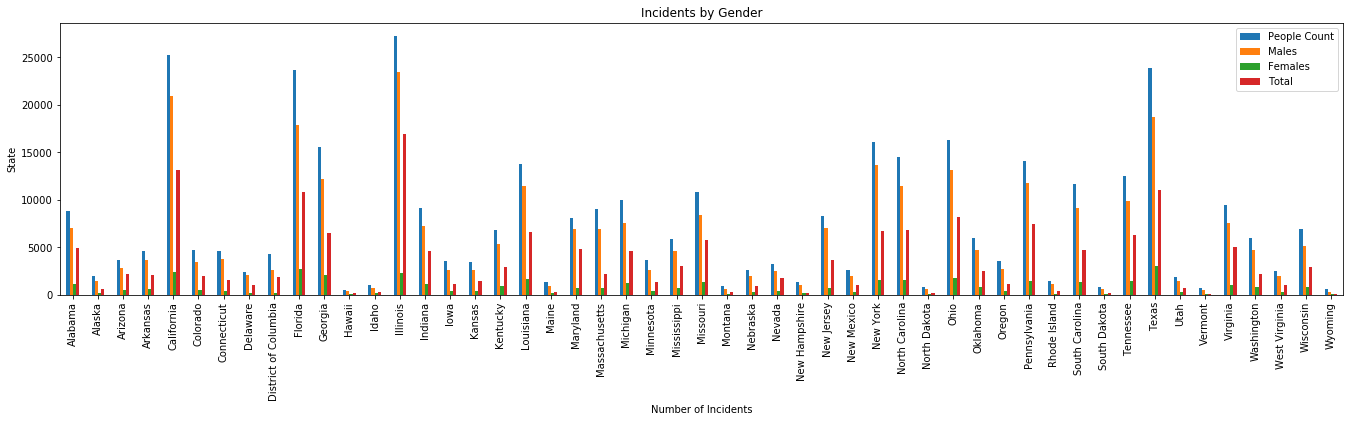

In [50]:
df[['state','people count', 'Males', 'Females', 'total']].groupby('state').sum().plot(kind='bar', figsize=(23, 5))
plt.title('Incidents by Gender')
plt.legend(['People Count', 'Males', 'Females', 'Total'])
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.show()

## Exploratory Analysis

In [51]:
import statsmodels.api as sm

from scipy.stats.mstats import winsorize
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

In [52]:
non_cont = df.select_dtypes(['object']).columns
print(non_cont)
print('Number of none continuous columns: {}'.format(len(non_cont)))

Index(['state', 'city_or_county', 'address', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'location_description', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'address_full', 'weekdayname', 'gender'],
      dtype='object')
Number of none continuous columns: 17


In [53]:
cont = df.select_dtypes(['int64', 'float64']).columns
print(cont)
print('Number of continuous columns: {}'.format(len(cont)))

Index(['incident_id', 'n_killed', 'n_injured', 'congressional_district',
       'latitude', 'longitude', 'n_guns_involved', 'state_house_district',
       'state_senate_district', 'year', 'month', 'monthday', 'weekday',
       'total', 'Males', 'Females', 'Gender_Unknown', 'people count'],
      dtype='object')
Number of continuous columns: 18


In [54]:
# Removing saleprice and id from cont.
cont = cont.drop(['total'])

c:\program files\python38\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


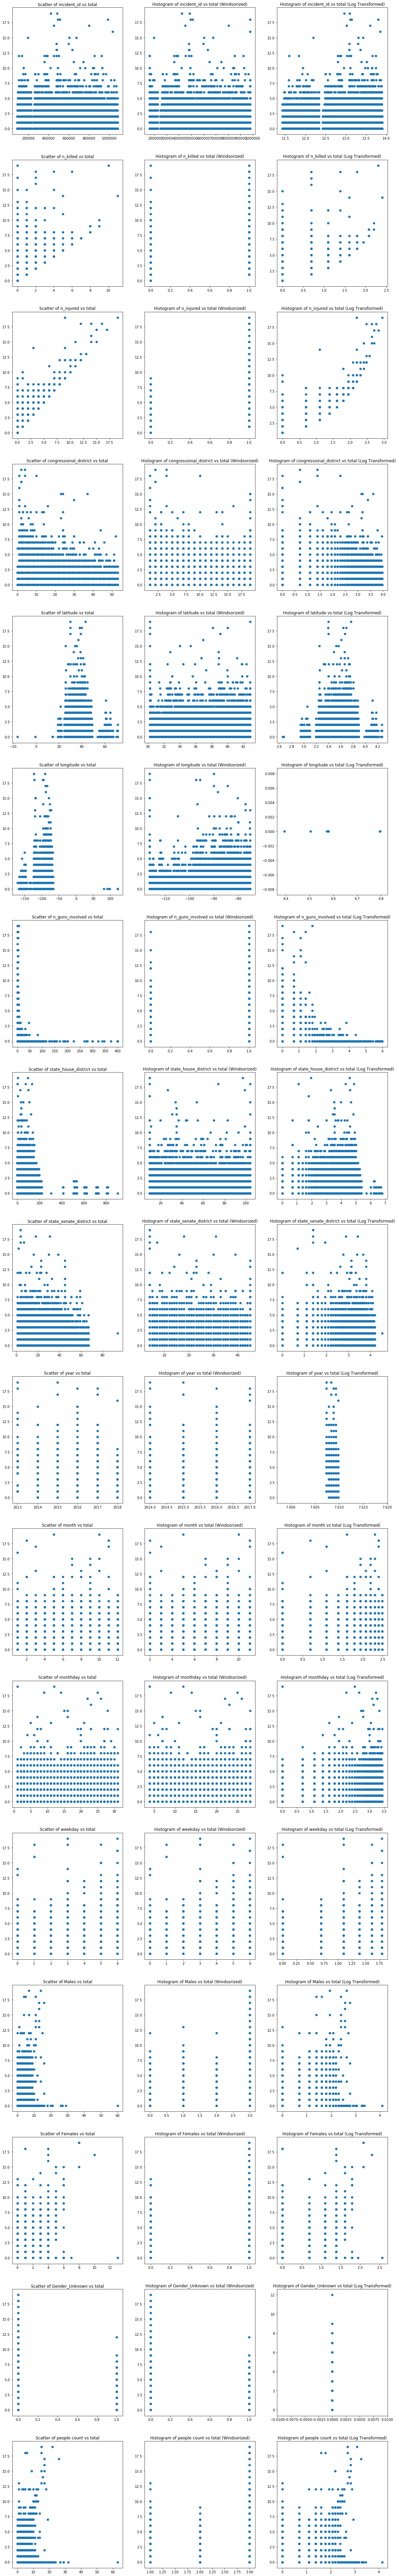

In [55]:
plt.figure(figsize=(20,140))
i = 1
z = len(cont)
for col in cont:
    name = 'total'
    x = df['total']
    d = df[col]
    # Ignoring Zeros with log calculation
    l = np.log(d.replace(0, np.nan))
    w = winsorize(d, (0.10, 0.10))
    
    plt.subplot(z, 3, i)
    plt.scatter(d, x)
    plt.title('Scatter of ' + col + ' vs {}'.format(name))
    i += 1
    
    plt.subplot(z, 3, i)
    plt.scatter(w, x)
    plt.title('Histogram of ' + col + ' vs {} (Windsorized)'.format(name))
    i += 1
    
    plt.subplot(z, 3, i)
    plt.scatter(l, x)
    plt.title('Histogram of ' + col + ' vs {} (Log Transformed)'.format(name))
    i += 1
    
plt.show()

In [56]:
corr = np.abs(df.iloc[:,1:].corr().loc[:,'total']).sort_values(ascending=False)
corr

total                     1.000000
n_injured                 0.781916
n_killed                  0.474778
people count              0.370959
Males                     0.339680
Gender_Unknown            0.253157
Females                   0.242282
weekday                   0.066052
latitude                  0.061069
n_guns_involved           0.052551
state_senate_district     0.051121
congressional_district    0.028936
state_house_district      0.023654
month                     0.017588
longitude                 0.007003
year                      0.006897
monthday                  0.003248
Name: total, dtype: float64

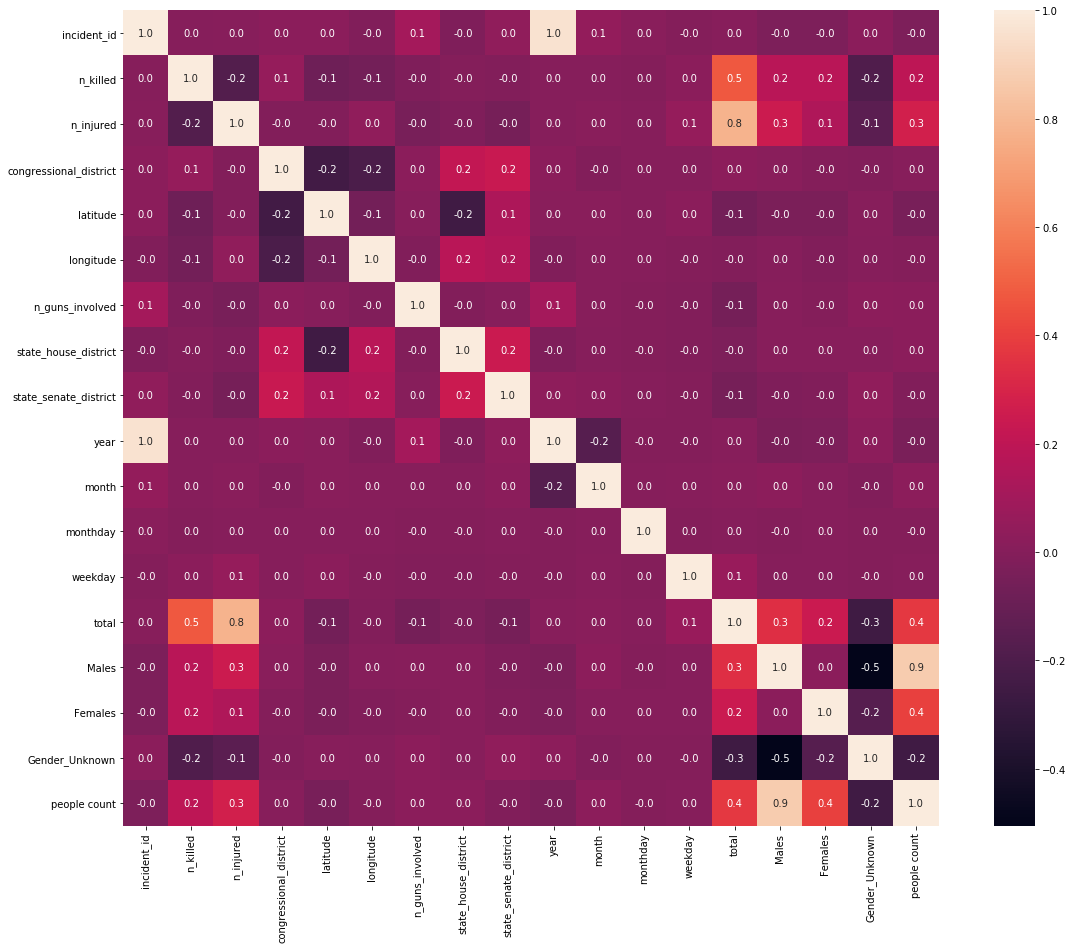

In [57]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')

## Predictive Models

### Predictive models from the top ten states.

In [109]:
top_ten_states = df['state'].value_counts().head(10)
df_states = df[df['state'].isin(top_ten_states.index)]

In [110]:
df_states = pd.concat([df_states,pd.get_dummies(df_states['state'], prefix='state', drop_first=True)], axis=1)
dummy_col_names_states = list(pd.get_dummies(df_states['state'], prefix='state', drop_first=True).columns)

In [111]:
# Target variable set as Y
Y = df_states['total']
# Feature set as X
X = df_states[['Males', 'Females', 'people count', 'weekday'] + dummy_col_names_states]

In [112]:
X = sm.add_constant(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, x_train).fit()

results.summary()

c:\program files\python38\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     1823.
Date:                Sun, 24 May 2020   Prob (F-statistic):               0.00
Time:                        06:19:32   Log-Likelihood:            -1.0354e+05
No. Observations:               93690   AIC:                         2.071e+05
Df Residuals:                   93676   BIC:                         2.072e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3531      0.008     42.011      0.000       0.337       0.370
Males                    0.3605      0.007     48.776      0.000       0.346       0.375
Females                  0.5567      0.009     61.422      0.000       0.539       0.574
people count            -0.1088      0.008    -13.158      0.000      -0.125      -0.093
weekday                  0.0253      0.001     21.420      0.000       0.023       0.028
state_Florida           -0.0650      0.009     -7.013      0.000      -0.083      -0.047
state_Georgia           -0.1322      0.011    -12.239      0.000      -0.153      -0.111
state_Illinois           0.1477      0.009     16.593      0.000       0.130       0.165
state_Louisiana         -0.0542      0.011     -4.863      0.000      -0.076      -0.032
state_New York          -0.1565      0.010    -14.927      0.000      -0.177      -0.136
state_North Carolina    -0.0317      0.011     -2.924      0.003      -0.053      -0.010
state_Ohio              -0.0079      0.010     -0.764      0.445      -0.028       0.012
state_Pennsylvania       0.0052      0.011      0.484      0.629      -0.016       0.026
state_Texas             -0.0483      0.010     -5.083      0.000      -0.067      -0.030
==============================================================================
Omnibus:                    32767.735   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           531945.273
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      14.402   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

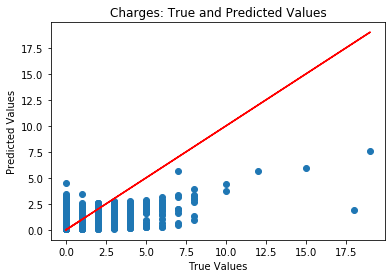

Mean absolute error of the prediction is: 0.5354131666779633
Mean squared error of the prediction is: 0.5415837067593846
Root mean squared error of the prediction is: 0.7359237098771751
Mean absolute percentage error of the prediction is: inf


In [113]:
# Setting predictions to y_preds
y_preds = results.predict(x_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Charges: True and Predicted Values')
plt.show()

print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [114]:
n_neighbor = 3
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
knn_w = neighbors.KNeighborsClassifier(n_neighbors=n_neighbor)

knn.fit(X, Y)
knn_w.fit(X, Y)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.05 (+/- 0.08)


c:\program files\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Weighted Accuracy: 0.53 (+/- 0.04)


Just taking the k-nearest neighbor provides less accurate predictions.  Utilizing the weighted k-nearest neighbor improves the accuracy of the prediction.

In [115]:
lrm = LinearRegression()

lrm.fit(x_train, y_train)

# Predictions
y_preds_train = lrm.predict(x_train)
y_preds_test = lrm.predict(x_test)

print('R-squared of the model in training set is: {}'.format(lrm.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(lrm.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))
#print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.20193301178180445
-----Test set statistics-----
R-squared of the model in test set is: 0.2023751977670788
Mean absolute error of the prediction is: 0.5354131666779575
Mean squared error of the prediction is: 0.5415837067593815
Root mean squared error of the prediction is: 0.735923709877173


In [116]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(x_train, y_train)

# Predictions
y_preds_train = lasso_cv.predict(x_train)
y_preds_test = lasso_cv.predict(x_test)

print('Best alpha value is: {}'.format(lasso_cv.alpha_))
print('R-squared of the model in training set is: {}'.format(lasso_cv.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(lasso_cv.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.20192753801648944
-----Test set statistics-----
R-squared of the model in test set is: 0.2023695493767187
Mean absolute error of the prediction is: 0.5356780854955373
Mean squared error of the prediction is: 0.5415875419914102
Root mean squared error of the prediction is: 0.7359263155991979


In [117]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(x_train, y_train)

# Predictions
y_preds_train = ridge_cv.predict(x_train)
y_preds_test = ridge_cv.predict(x_test)

print('Best alpha value is: {}'.format(ridge_cv.alpha_))
print('R-squared of the model in training set is: {}'.format(ridge_cv.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(ridge_cv.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 10.0
R-squared of the model in training set is: 0.20193279182272206
-----Test set statistics-----
R-squared of the model in test set is: 0.20238596597043979
Mean absolute error of the prediction is: 0.5355008125603152
Mean squared error of the prediction is: 0.541576395197009
Root mean squared error of the prediction is: 0.7359187422514859


In [118]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(x_train, y_train)

# Predictions
y_preds_train = elasticnet_cv.predict(x_train)
y_preds_test = elasticnet_cv.predict(x_test)

print('Best alpha value is: {}'.format(elasticnet_cv.alpha_))
print('R-squared of the model in training set is: {}'.format(elasticnet_cv.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(elasticnet_cv.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.20193122830814347
-----Test set statistics-----
R-squared of the model in test set is: 0.20237850923588663
Mean absolute error of the prediction is: 0.5355865391335872
Mean squared error of the prediction is: 0.5415814582867328
Root mean squared error of the prediction is: 0.7359221822222325


In [119]:
kfold = KFold(n_splits=5, random_state=42)
model = LinearRegression()
results = cross_val_score(model, x_train, y_train, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 20.076% (1.602%)


c:\program files\python38\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [120]:
model = LassoCV(alphas=alphas, cv=5)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 20.076% (1.601%)


In [121]:
model = RidgeCV(alphas=alphas, cv=5)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 20.076% (1.601%)


### Predictive models from the top ten cities.

In [125]:
top_ten_cities = df['city_or_county'].value_counts().head(10)
df_cities = df[df['city_or_county'].isin(top_ten_cities.index)]

In [126]:
df_cities = pd.concat([df_cities,pd.get_dummies(df_cities['city_or_county'], prefix='local', drop_first=True)], axis=1)
dummy_col_names_cities = list(pd.get_dummies(df_cities['city_or_county'], prefix='local', drop_first=True).columns)

In [127]:
# Target variable set as Y
Y = df_cities['total']
# Feature set as X
X = df_cities[['Males', 'Females', 'people count', 'weekday'] + dummy_col_names_cities]

In [128]:
X = sm.add_constant(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, x_train).fit()

results.summary()

c:\program files\python38\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sun, 24 May 2020   Prob (F-statistic):               0.00
Time:                        06:22:13   Log-Likelihood:                -28133.
No. Observations:               29114   AIC:                         5.629e+04
Df Residuals:                   29100   BIC:                         5.641e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4408      0.014     32.094      0.000       0.414       0.468
Males                  0.4497      0.012     36.773      0.000       0.426       0.474
Females                0.6921      0.015     45.692      0.000       0.662       0.722
people count          -0.1433      0.014    -10.442      0.000      -0.170      -0.116
weekday                0.0165      0.002      9.058      0.000       0.013       0.020
local_Chicago          0.1625      0.013     12.226      0.000       0.136       0.189
local_Houston         -0.0746      0.018     -4.056      0.000      -0.111      -0.039
local_Jacksonville    -0.0770      0.019     -4.096      0.000      -0.114      -0.040
local_Memphis         -0.0044      0.019     -0.239      0.811      -0.041       0.032
local_Milwaukee       -0.0262      0.018     -1.431      0.153      -0.062       0.010
local_New Orleans     -0.2212      0.017    -12.805      0.000      -0.255      -0.187
local_Philadelphia     0.1086      0.017      6.274      0.000       0.075       0.143
local_Saint Louis      0.0733      0.018      4.017      0.000       0.038       0.109
local_Washington      -0.1386      0.017     -7.929      0.000      -0.173      -0.104
==============================================================================
Omnibus:                     7551.704   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91787.439
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                      11.509   Cond. No.                         43.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

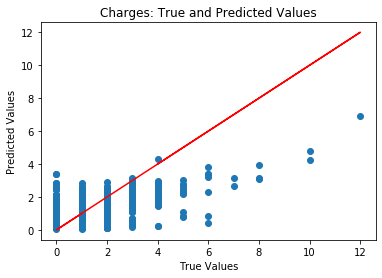

Mean absolute error of the prediction is: 0.4343128321960531
Mean squared error of the prediction is: 0.41577018906113755
Root mean squared error of the prediction is: 0.6448024418852162
Mean absolute percentage error of the prediction is: inf


In [129]:
# Setting predictions to y_preds
y_preds = results.predict(x_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Charges: True and Predicted Values')
plt.show()

print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [130]:
n_neighbor = 3
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
knn_w = neighbors.KNeighborsClassifier(n_neighbors=n_neighbor)

knn.fit(X, Y)
knn_w.fit(X, Y)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.10 (+/- 0.13)


c:\program files\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Weighted Accuracy: 0.64 (+/- 0.04)


In [131]:
lrm = LinearRegression()

lrm.fit(x_train, y_train)

# Predictions
y_preds_train = lrm.predict(x_train)
y_preds_test = lrm.predict(x_test)

print('R-squared of the model in training set is: {}'.format(lrm.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(lrm.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))
#print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.32138246555907124
-----Test set statistics-----
R-squared of the model in test set is: 0.3355136616555985
Mean absolute error of the prediction is: 0.4343128321960518
Mean squared error of the prediction is: 0.4157701890611388
Root mean squared error of the prediction is: 0.6448024418852171


In [132]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(x_train, y_train)

# Predictions
y_preds_train = lasso_cv.predict(x_train)
y_preds_test = lasso_cv.predict(x_test)

print('Best alpha value is: {}'.format(lasso_cv.alpha_))
print('R-squared of the model in training set is: {}'.format(lasso_cv.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(lasso_cv.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.3213783344263075
-----Test set statistics-----
R-squared of the model in test set is: 0.3355326635080491
Mean absolute error of the prediction is: 0.434639546604442
Mean squared error of the prediction is: 0.4157582995709717
Root mean squared error of the prediction is: 0.6447932223364105


In [133]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(x_train, y_train)

# Predictions
y_preds_train = ridge_cv.predict(x_train)
y_preds_test = ridge_cv.predict(x_test)

print('Best alpha value is: {}'.format(ridge_cv.alpha_))
print('R-squared of the model in training set is: {}'.format(ridge_cv.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(ridge_cv.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.321382426258209
-----Test set statistics-----
R-squared of the model in test set is: 0.33551863644873225
Mean absolute error of the prediction is: 0.4343512117464275
Mean squared error of the prediction is: 0.4157670763249358
Root mean squared error of the prediction is: 0.6448000281675985


In [134]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(x_train, y_train)

# Predictions
y_preds_train = elasticnet_cv.predict(x_train)
y_preds_test = elasticnet_cv.predict(x_test)

print('Best alpha value is: {}'.format(elasticnet_cv.alpha_))
print('R-squared of the model in training set is: {}'.format(elasticnet_cv.score(x_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {}'.format(elasticnet_cv.score(x_test, y_test)))
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds_test)))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.3213809727900736
-----Test set statistics-----
R-squared of the model in test set is: 0.33553103893304437
Mean absolute error of the prediction is: 0.43453179364286115
Mean squared error of the prediction is: 0.4157593160702101
Root mean squared error of the prediction is: 0.6447940105725317


In [135]:
kfold = KFold(n_splits=5, random_state=42)
model = LinearRegression()
results = cross_val_score(model, x_train, y_train, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 31.575% (3.269%)


c:\program files\python38\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [136]:
model = LassoCV(alphas=alphas, cv=5)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 31.575% (3.270%)


In [137]:
model = RidgeCV(alphas=alphas, cv=5)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

Accuracy: 31.575% (3.269%)
